# CALIFORNIA HOUSING DATASET

# Importing required modules

In [ ]:
import os
import tarfile
from six.moves import urllib

In [ ]:
DOWNLOAD_ROOT="https://raw.githubusercontent.com/ageron/handson-ml/master/"
DOWNLOAD_PATH=os.path.join("datasets","housing")
DOWNLOAD_URL=DOWNLOAD_ROOT+"datasets/housing/housing.tgz"

# Fetching data from url

In [ ]:
def fetch_data(url=DOWNLOAD_URL,Path=DOWNLOAD_PATH):
    if not os.path.isdir(Path):
        os.makedirs(Path)
    tgz_path=os.path.join(Path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    housing_file=tarfile.open(tgz_path)
    housing_file.extractall(path=Path)
    housing_file.close()

In [ ]:
fetch_data()

# Loading the data

In [ ]:
import pandas as pd

In [ ]:
def load_csv(housing_path=DOWNLOAD_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
df=load_csv()

# Viewing the data

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# categorical attribute : ocean_proximity
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


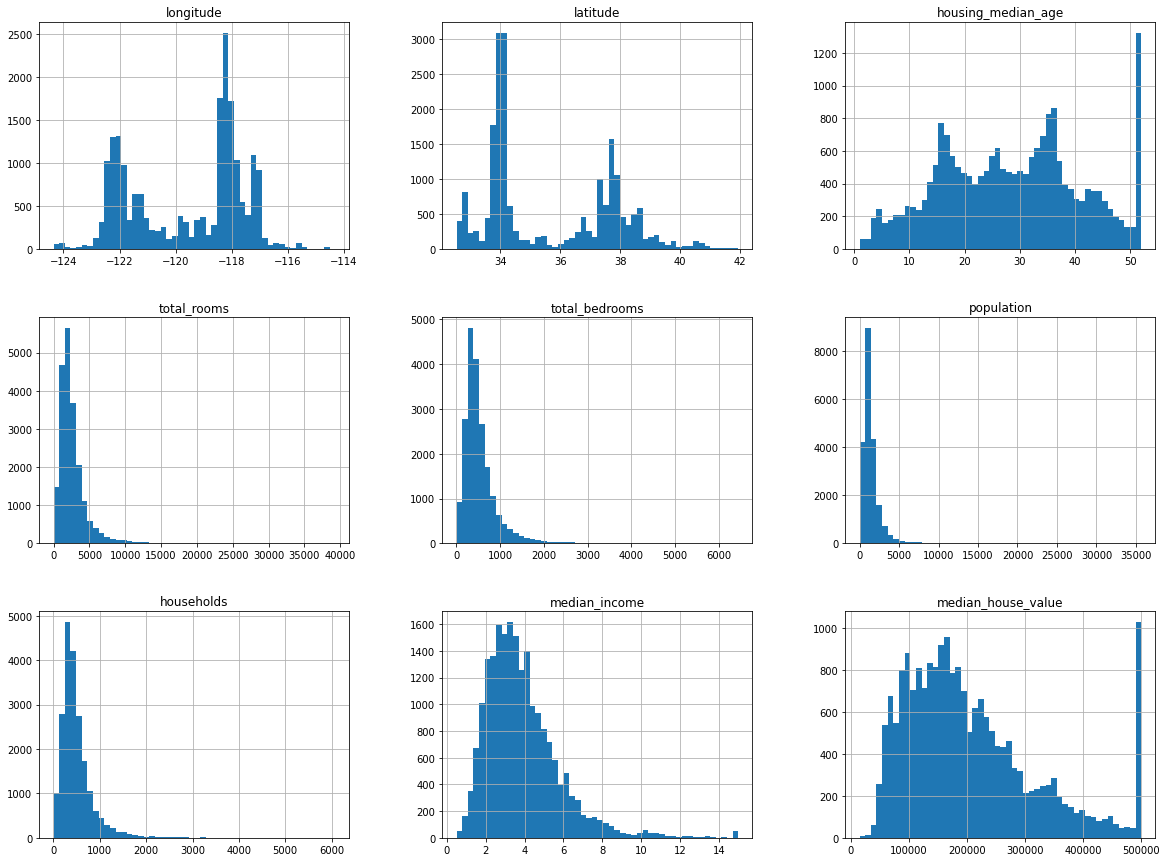

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

# Seperating the training and testing data

### 20% test data, 80% train data selected randomly

In [ ]:
import numpy as np

In [ ]:
def split_train_test(data,ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_data_size=int(len(data)*ratio)
    test_data_indices=shuffled_indices[:test_data_size]
    train_data_indices=shuffled_indices[test_data_size:]
    
    return data.iloc[train_data_indices],data.iloc[test_data_indices]

train_data,test_data=split_train_test(df,0.2)
print("train data size: ",len(train_data),"\ntest data size: ",len(test_data))

train data size:  16512 
test data size:  4128


### Splitting with id so that different data is not generated at every program run

In [ ]:
import hashlib

In [ ]:
def test_data_check(identifier,ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*ratio

def split_train_test_by_id(data,ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    test_data_indices=ids.apply(lambda id_:test_data_check(id_,ratio,hash))
    return data.loc[-test_data_indices],data.loc[test_data_indices]

In [ ]:
housing_data=df.reset_index()
train_data,test_data=split_train_test_by_id(housing_data,0.2,"index")
print("train data size: ",len(train_data),"\ntest data size: ",len(test_data))

train data size:  16362 
test data size:  4278


### Splitting based on income category

In [ ]:
housing_data["income_cat"]=np.ceil(housing_data["median_income"]/1.5)

In [ ]:
housing_data["income_cat"].where(housing_data["income_cat"]<5,5.0,inplace=True)

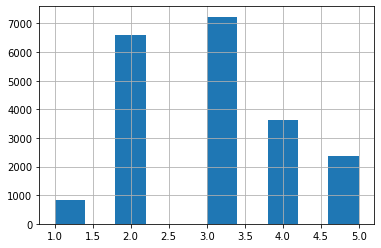

In [ ]:
housing_data["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing_data,housing_data["income_cat"]):
    train_data=housing_data.loc[train_index]
    test_data=housing_data.loc[test_index]

# Removing the income_cat attribute to bring the data to original position
for attr in (train_data,test_data):
    attr.drop("income_cat",axis=1,inplace=True)
    
print("Train data length: ",len(train_data))
print("Test data length: ",len(test_data))

Train data length:  16512
Test data length:  4128


In [ ]:
print("TRAIN DATA INFO\n")
train_data.info()
print("\n\n")
print("TEST DATA INFO\n")
test_data.info()

TRAIN DATA INFO

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16354 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB



TEST DATA INFO

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  D

# Visualizing Geographical Data

### Plot based on lattitude and longitude

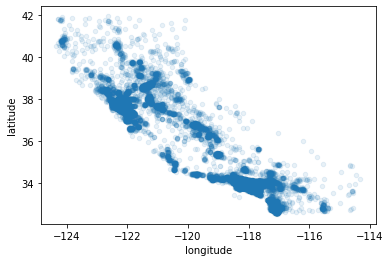

In [ ]:
train_data.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

### Plot to show house price based on location and population density

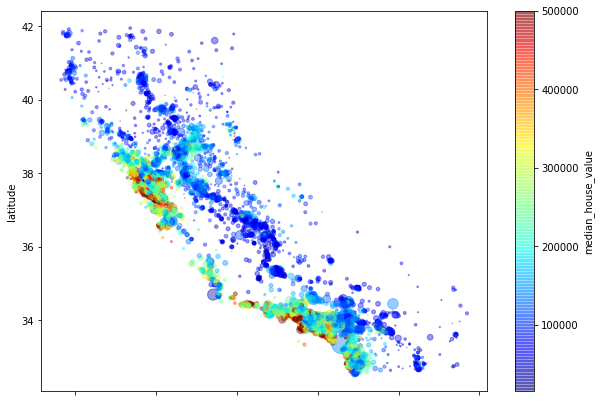

In [ ]:
marker_size=train_data["population"]/100
colored="median_house_value"

train_data.plot(kind="scatter",x="longitude",y="latitude",
            alpha=0.4,s=marker_size,c=colored,cmap=plt.get_cmap("jet")
            ,colorbar=True,figsize=(10,7))

   #### Observation : Coastal area, high population -> high price

# Looking for Correlations

### Creating the correlation matrix

In [ ]:
# .corr() is pandas function to find correlation matrix
correlation_matrix=train_data.corr()
correlation_matrix

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
index,1.000000,-0.111913,0.079078,-0.181359,0.059255,0.027682,0.023079,0.026254,0.069915,0.067723
longitude,-0.111913,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,0.079078,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.181359,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.059255,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.027682,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.023079,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.026254,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,0.069915,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,0.067723,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


### See which paramters have higher correlation with output (housing_price)

In [ ]:
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
index                 0.067723
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### Observation: median income has maximum correlation with output, followed by total_rooms and so on

#### Plotting a heatmap

In [ ]:
import seaborn as sb

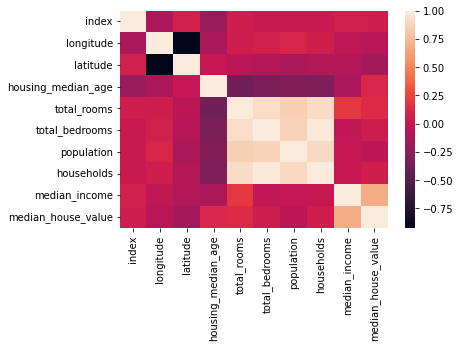

In [ ]:
sb.heatmap(correlation_matrix)

#### Pairplot between the parameters

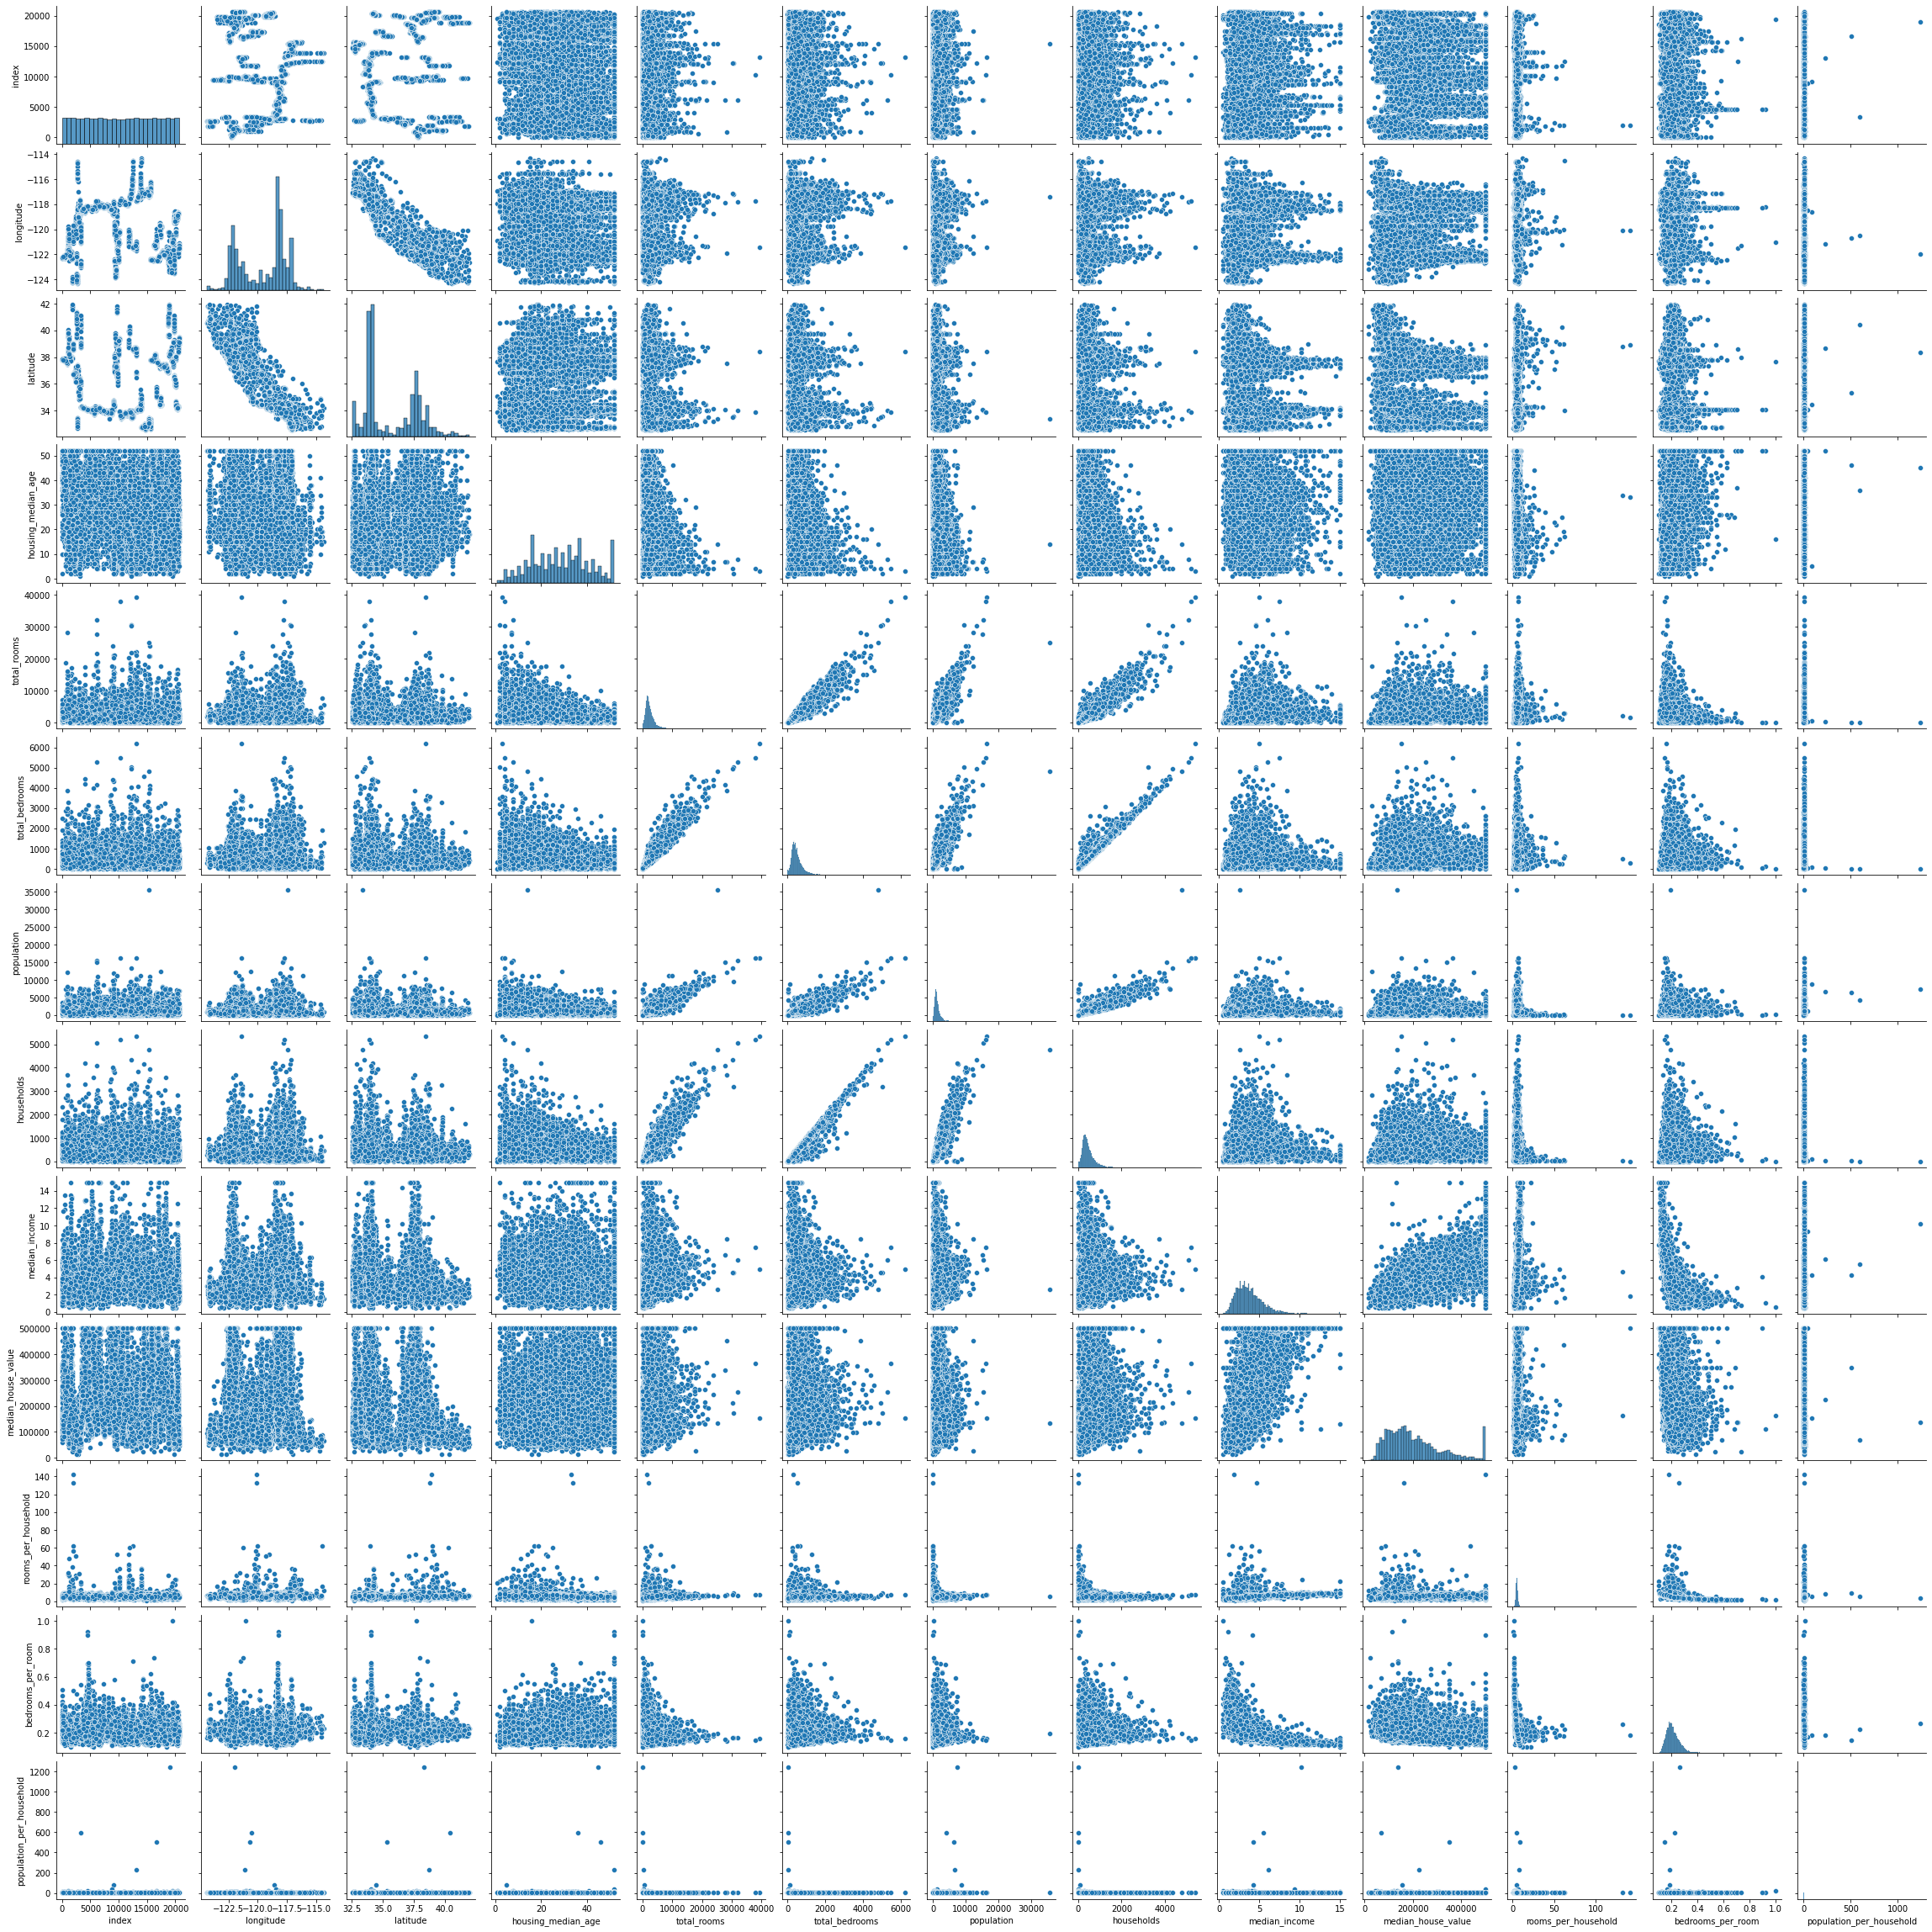

In [ ]:
sb.pairplot(train_data)

# Experimenting with Attribute Combinations

### Finding out rooms per household, bedrooms per room, population per household to see if they have more correlation with median house price

In [ ]:
train_data['rooms_per_household'] = train_data['total_rooms']/train_data['households']
train_data['bedrooms_per_room'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['population_per_household'] = train_data['population']/train_data['households']

In [ ]:
train_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [ ]:
train_data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
index                       0.067723
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Observation : The newly found features have more correlation with the output label

# Prepare the Data for Machine Learning Algorithms

In [ ]:
# seperate the features and the labels

housing = train_data.drop('median_house_value', axis = 1) # drop() creates a copy of the column
housing_labels = train_data['median_house_value'].copy()

housing.head(),housing_labels.head()

(       index  longitude  ...  bedrooms_per_room  population_per_household
 17606  17606    -121.89  ...           0.223852                  2.094395
 18632  18632    -121.93  ...           0.159057                  2.707965
 14650  14650    -117.20  ...           0.241291                  2.025974
 3230    3230    -119.61  ...           0.200866                  4.135977
 3555    3555    -118.59  ...           0.231341                  3.047847
 
 [5 rows x 13 columns], 17606    286600.0
 18632    340600.0
 14650    196900.0
 3230      46300.0
 3555     254500.0
 Name: median_house_value, dtype: float64)

# Data Cleaning

In [ ]:
# Checking null values

housing.isnull().sum()

index                         0
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [ ]:
# replace null values in total_bedrooms with the median value
# We can also use sklearn Imputer for this purpose

med = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(med, inplace = True)

med_ = housing['bedrooms_per_room'].median()
housing['bedrooms_per_room'].fillna(med_, inplace = True)

housing.isnull().sum()

index                       0
longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

# Handling text and categorical attributes

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     16512 non-null  int64  
 1   longitude                 16512 non-null  float64
 2   latitude                  16512 non-null  float64
 3   housing_median_age        16512 non-null  float64
 4   total_rooms               16512 non-null  float64
 5   total_bedrooms            16512 non-null  float64
 6   population                16512 non-null  float64
 7   households                16512 non-null  float64
 8   median_income             16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16512 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.8+ MB

In [ ]:
categorical = 'ocean_proximity'
print(housing[categorical].value_counts())
print("no of categories : ",len(housing[categorical].value_counts()))

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64
no of categories :  5


In [ ]:
# We can perform Label Encoding and One Hot Encoding on the categorical column(s)

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder1 = LabelEncoder()
encoder2 = OneHotEncoder()

le_col = encoder1.fit_transform(housing[categorical])
le_col


array([0, 0, 4, ..., 1, 0, 3])

In [ ]:
one_hot_cols = encoder2.fit_transform(le_col.reshape(-1,1))
one_hot_cols = one_hot_cols.toarray()
one_hot_cols

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,cat0,cat1,cat2,cat3,cat4
17606,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395,1.0,0.0,0.0,0.0,0.0
18632,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965,1.0,0.0,0.0,0.0,0.0
14650,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974,0.0,0.0,0.0,0.0,1.0
3230,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977,0.0,1.0,0.0,0.0,0.0
3555,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847,1.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(5):
  housing['cat'+str(i)] = one_hot_cols[:,i]

housing.drop('ocean_proximity',inplace=True,axis=1)

one_hot_cols[:,0]

array([1., 1., 0., ..., 0., 1., 0.])

In [ ]:
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,cat0,cat1,cat2,cat3,cat4
17606,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,1.0,0.0,0.0,0.0,0.0
18632,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,1.0,0.0,0.0,0.0,0.0
14650,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0.0,0.0,0.0,0.0,1.0
3230,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0.0,1.0,0.0,0.0,0.0
3555,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,1.0,0.0,0.0,0.0,0.0


# Applying linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67986.46475239107